In [71]:
library(dplyr)
library(geosphere)

In [2]:
#1 Import data
data2 <- read.csv("./Data_CitiBike/JC-201902-citibike-tripdata.csv")
data3 <- read.csv("./Data_CitiBike/JC-201903-citibike-tripdata.csv")
data4 <- read.csv("./Data_CitiBike/JC-201904-citibike-tripdata.csv")
data5 <- read.csv("./Data_CitiBike/JC-201905-citibike-tripdata.csv")
data6 <- read.csv("./Data_CitiBike/JC-201906-citibike-tripdata.csv")

In [3]:
#2 Merge dataframes
data <- rbind(data2,data3,data4,data5,data6)
nrow(data)
colnames(data)

[1] 150792

[1] "tripduration"            "starttime"              
 [3] "stoptime"                "start.station.id"       
 [5] "start.station.name"      "start.station.latitude" 
 [7] "start.station.longitude" "end.station.id"         
 [9] "end.station.name"        "end.station.latitude"   
[11] "end.station.longitude"   "bikeid"                 
[13] "usertype"                "birth.year"             
[15] "gender"

In [4]:
#3 Eliminate na records if they exist
data <- na.omit(data)
nrow(data)

[1] 150792

In [5]:
#4.1 Compute average and mean trip duration in minutes
mean <- mean(data[,"tripduration"])/60
mean 
median <- median(data[,"tripduration"])/60
median

[1] 12.81071

[1] 5.683333

In [6]:
#4.2 Find lowest and highes value for the trip duration
maxduration <- max(data[,"tripduration"])/60
maxduration
minduration <- min(data[,"tripduration"])/60
minduration

[1] 28817

[1] 1.016667

In [7]:
#4.3 Repeat poin 4.1 eliminating trips with duration higher than 3 hours, also print the number of skimmed values
mean <- mean(data[data$tripduration < 10800,"tripduration"])/60
mean 
median <- median(data[data$tripduration < 10800,"tripduration"])/60
median
skimmed <- nrow(data)-nrow(data[data$tripduration < 180, ])
skimmed

[1] 9.221901

[1] 5.666667

[1] 130434

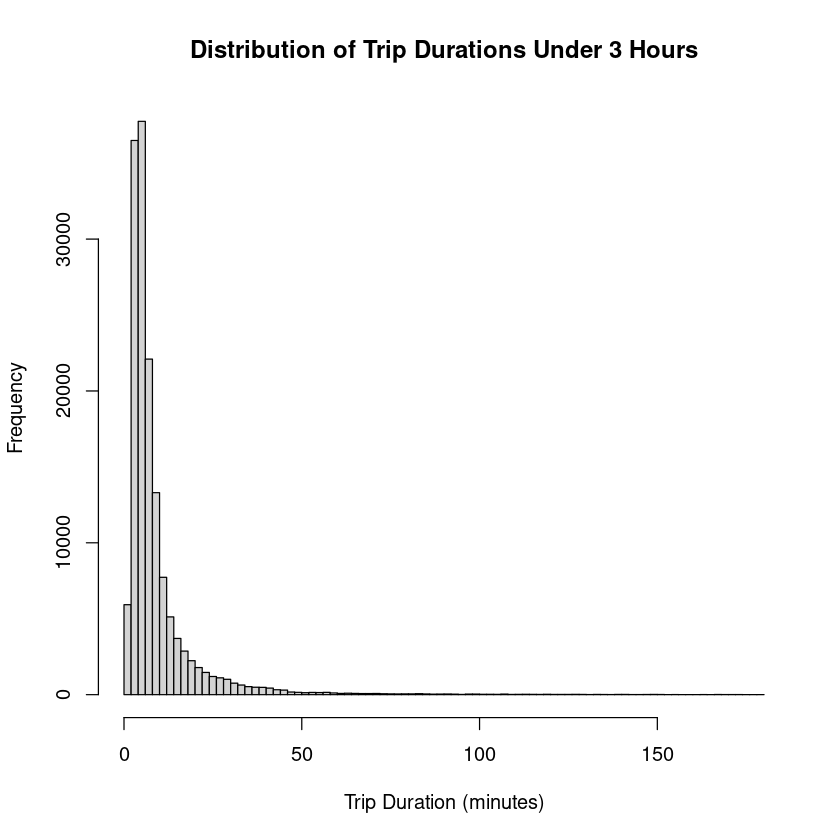

In [8]:
#4.4 Plot the distribution of the tripduration when it is lower than 3 hours
hist((data[data$tripduration < 10800, "tripduration"]/60), 
     xlab = "Trip Duration (minutes)", 
     ylab = "Frequency", 
     main = "Distribution of Trip Durations Under 3 Hours",
     nclass=100)


[1] 768.6428

month,avg_tripduration
<chr>,<dbl>
02,10.088993
03,9.102939
04,11.899928
05,13.735333
06,16.228166


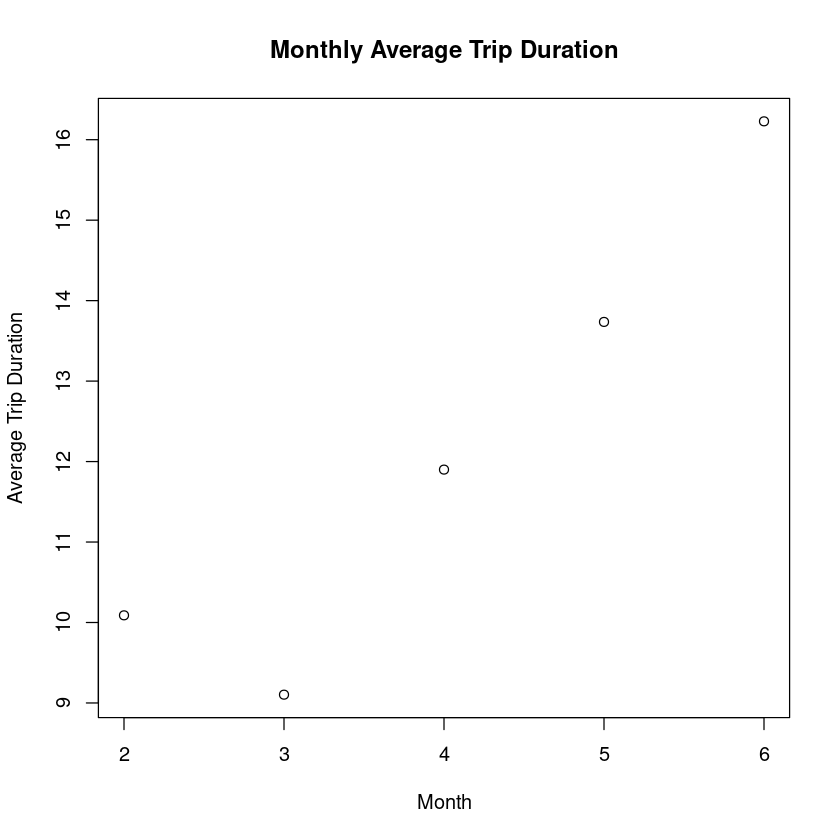

In [9]:
#5 Plot the monthly average of the trip duration
data$month <- substr(data$starttime, 6, 7)
#data
mean(data$tripduration)
monthly_average <- data %>%
  group_by(month) %>%
  summarize(avg_tripduration = mean(tripduration)/60)
monthly_average

plot(monthly_average$month, monthly_average$avg_tripduration,
     xlab = "Month", 
     ylab = "Average Trip Duration", 
     main = "Monthly Average Trip Duration")


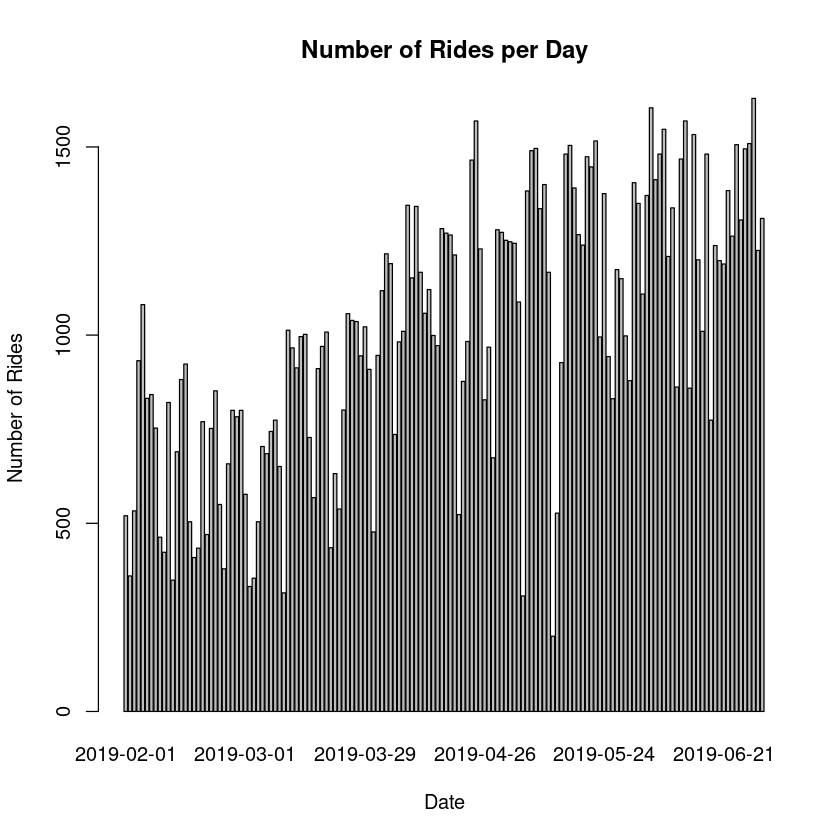

In [27]:
#6.1 Plot the number of rides per day
data$date <- substr(data$starttime, 1, 10)
#data$date
day_rides_num <- data %>%
  group_by(date) %>%
  summarize(num_rides = n())
#day_rides_num
barplot(day_rides_num$num_rides,
        names.arg = day_rides_num$date,
        xlab = "Date",
        ylab = "Number of Rides",
        main = "Number of Rides per Day")

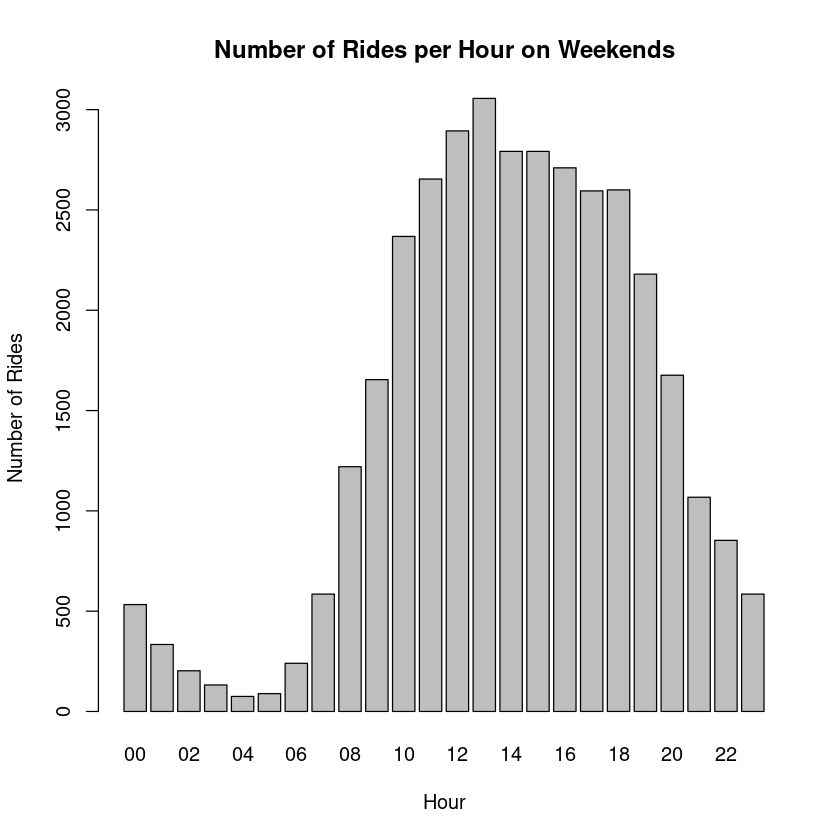

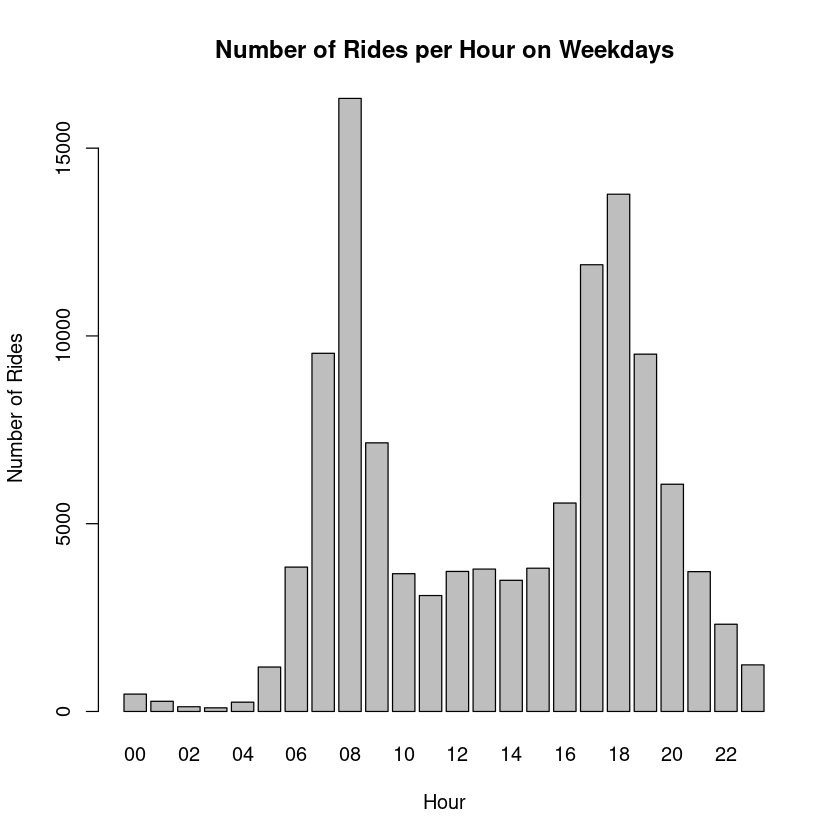

In [63]:
#6.2 Plot hourly distr on weekdays and on weekends
data$hour <- substr(data$starttime, 12,13)
#data$date
data$dayname <- weekdays(as.Date(data$date))
#data$dayname
weekenddata <- data[data$dayname %in% c("sabato","domenica"), ]
weekdaysdata <- data[data$dayname %in% c("lunedì","martedì","mercoledì","giovedì","venerdì"), ]
#weekenddata
weekends <- weekenddata %>%
  group_by(hour) %>%
  summarize(num_rides = n())
weekdays <- weekdaysdata %>%
  group_by(hour) %>%
  summarize(num_rides = n())
barplot(weekends$num_rides,
        names.arg = weekends$hour,
        xlab = "Hour",
        ylab = "Number of Rides",
        main = "Number of Rides per Hour on Weekends")
barplot(weekdays$num_rides,
        names.arg = weekdays$hour,
        xlab = "Hour",
        ylab = "Number of Rides",
        main = "Number of Rides per Hour on Weekdays")

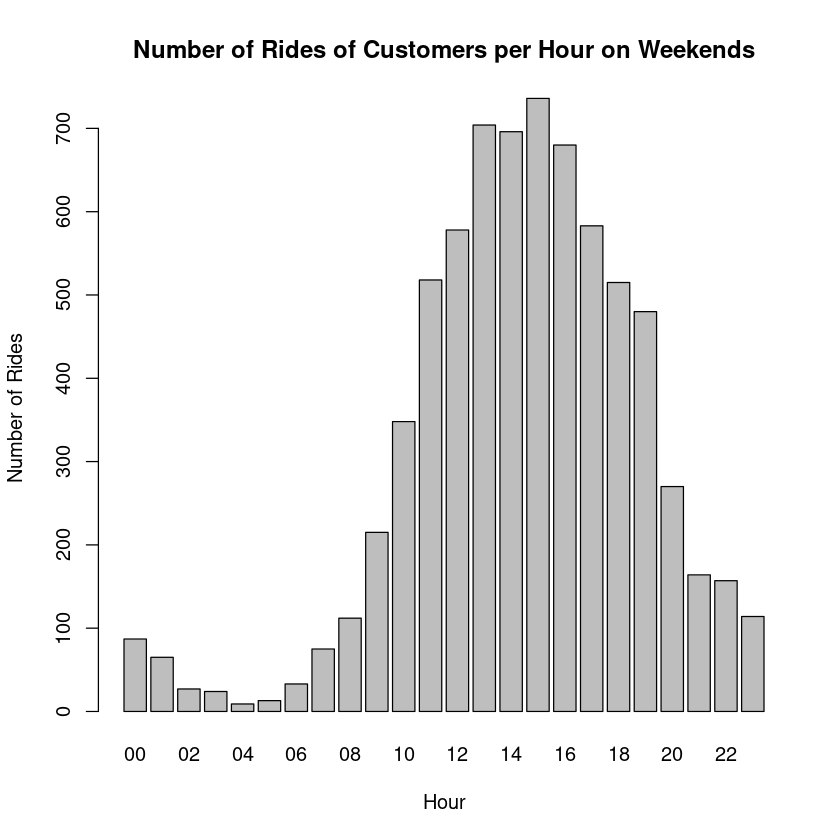

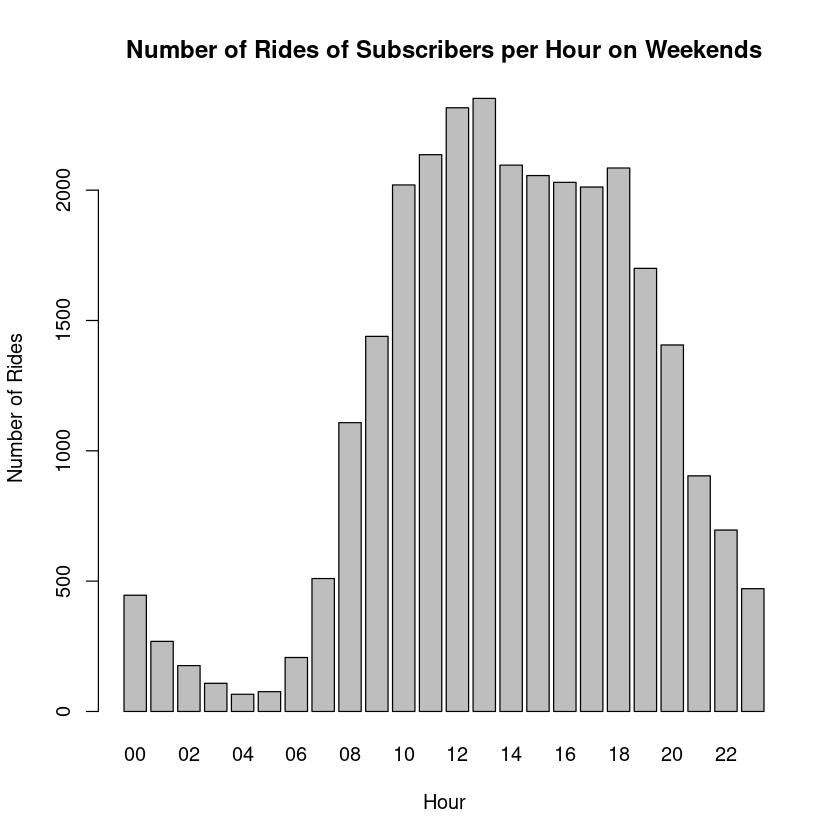

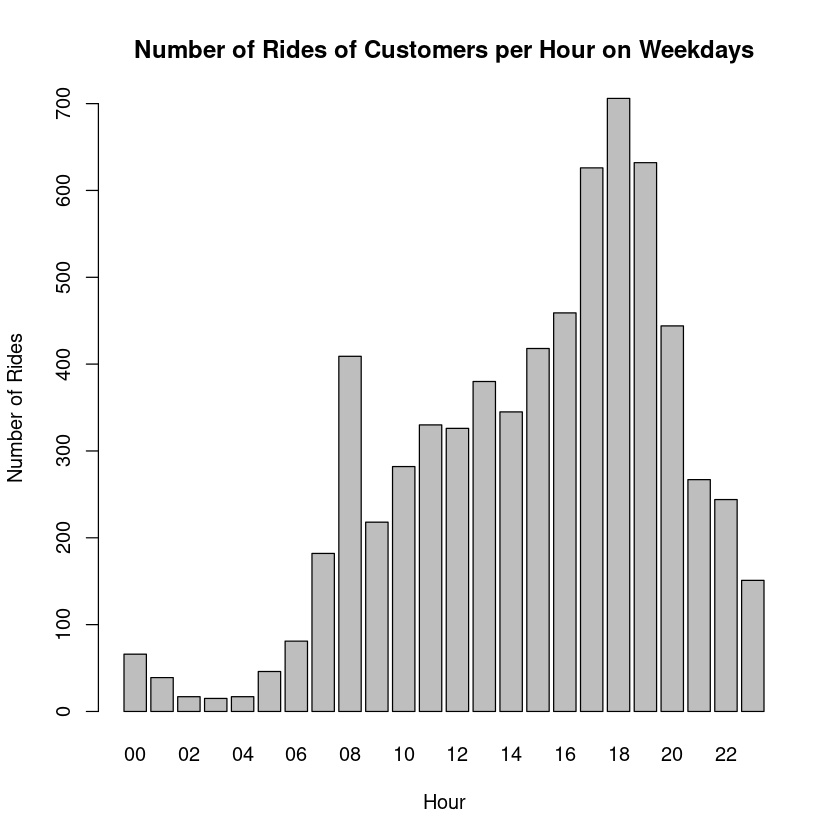

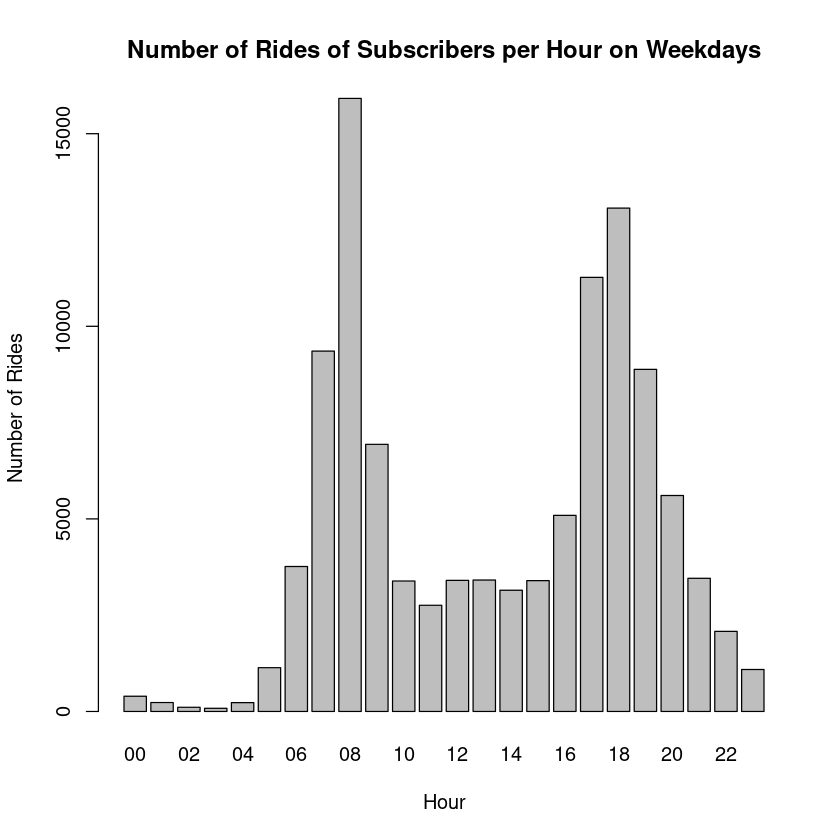

In [69]:
#6.3 Do 6.2 again but separating customers and subscribers
weekenddatacustomer <- weekenddata[weekenddata$usertype == "Customer",]
weekenddatasubscriber <- weekenddata[weekenddata$usertype == "Subscriber",]
weekdaysdatacustomer <- weekdaysdata[weekdaysdata$usertype == "Customer",]
weekdaysdatasubscriber <- weekdaysdata[weekdaysdata$usertype == "Subscriber",]

weekendscustomer <- weekenddatacustomer %>%
  group_by(hour) %>%
  summarize(num_rides = n())
weekendssubscriber <- weekenddatasubscriber %>%
  group_by(hour) %>%
  summarize(num_rides = n())
weekdayscustomer <- weekdaysdatacustomer %>%
  group_by(hour) %>%
  summarize(num_rides = n())
weekdayssubscriber <- weekdaysdatasubscriber %>%
  group_by(hour) %>%
  summarize(num_rides = n())
barplot(weekendscustomer$num_rides,
        names.arg = weekendscustomer$hour,
        xlab = "Hour",
        ylab = "Number of Rides",
        main = "Number of Rides of Customers per Hour on Weekends")
barplot(weekendssubscriber$num_rides,
        names.arg = weekendssubscriber$hour,
        xlab = "Hour",
        ylab = "Number of Rides",
        main = "Number of Rides of Subscribers per Hour on Weekends")
barplot(weekdayscustomer$num_rides,
        names.arg = weekdayscustomer$hour,
        xlab = "Hour",
        ylab = "Number of Rides",
        main = "Number of Rides of Customers per Hour on Weekdays")
barplot(weekdayssubscriber$num_rides,
        names.arg = weekdayssubscriber$hour,
        xlab = "Hour",
        ylab = "Number of Rides",
        main = "Number of Rides of Subscribers per Hour on Weekdays")

In [93]:
#7.1 Calculate average speed of a user ignoring > 1 hour trips
data_one_hour <- data[data$tripduration<3600,]
#data_one_hour
data_one_hour$dist <- distHaversine(cbind(data_one_hour$start.station.longitude,data_one_hour$start.station.latitude),
                                    cbind(data_one_hour$end.station.longitude,data_one_hour$end.station.latitude))
data_one_hour$speed <- (data_one_hour$dist/1000)/(data_one_hour$tripduration/3600)
mean(data_one_hour$speed)

[1] 9.240097

[1]  6.755692  9.858439  9.726206  9.601913 10.399958

[1] "d<500m"        "500m<d<1000m"  "1000m<d<2000m" "2000m<d<3000m"
[5] "d>3000m"

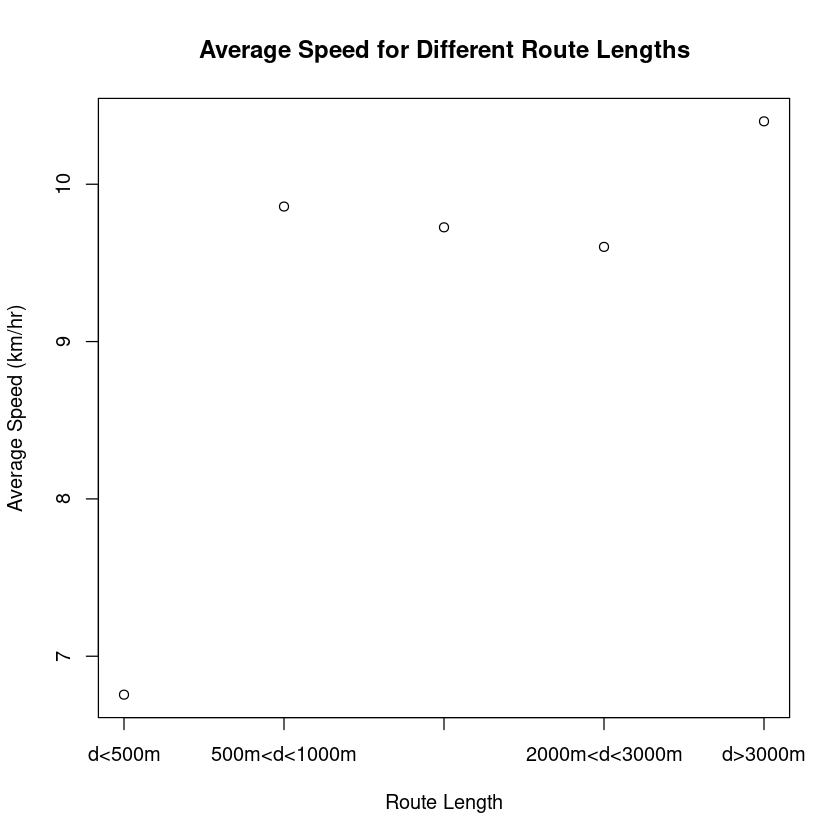

In [124]:
#7.2 Plot average speed for different sets of route lenght
route_length <- c("d<500m","500m<d<1000m","1000m<d<2000m","2000m<d<3000m","d>3000m")
average_speed <- c(mean(data_one_hour[data_one_hour$dist<500,]$speed),
                    mean(data_one_hour[between(data_one_hour$dist,500,1000),]$speed),
                    mean(data_one_hour[between(data_one_hour$dist,1000,2000),]$speed),
                    mean(data_one_hour[between(data_one_hour$dist,200,3000),]$speed),
                    mean(data_one_hour[data_one_hour$dist>3000,]$speed))
average_speed
route_length
plot(average_speed,
    xlab = "Route Length", 
     ylab = "Average Speed (km/hr)", 
     main = "Average Speed for Different Route Lengths",
     xaxt = "n")

axis(1, at = 1:length(route_length), labels = route_length)     #graph too small to see central label

[1]  7.364482 10.143929 10.118891  9.910997 10.650365

[1] 5.160377 8.661785 8.637063 8.533956 9.444282

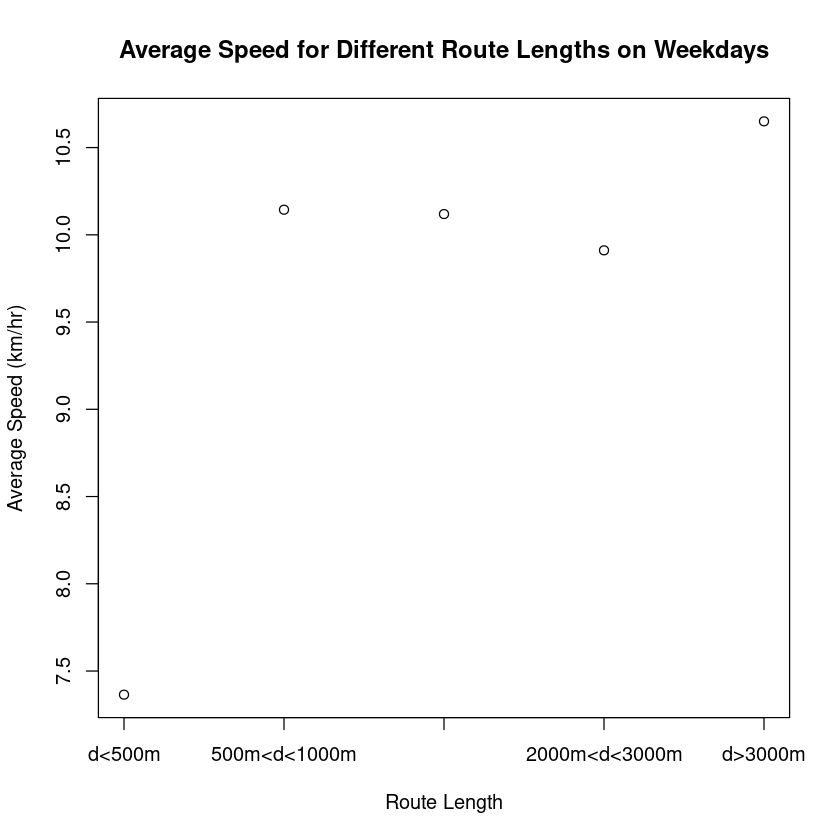

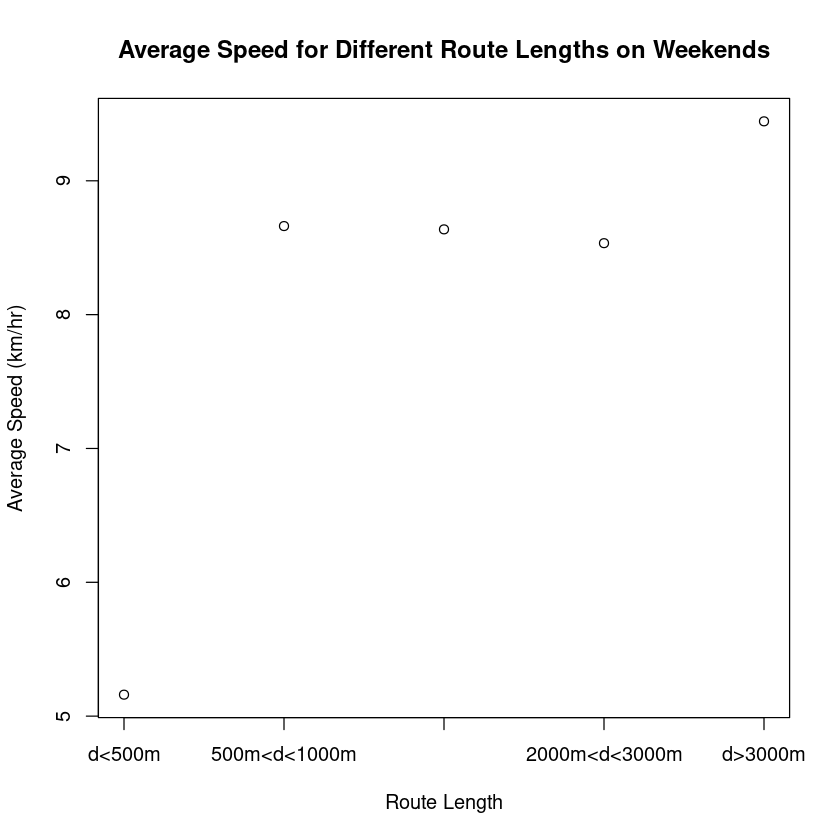

In [131]:
#7.3 Do 7.2 again but divided for weekdays and weekends
#data_one_hour
data_one_hour_weekend <- data_one_hour[data_one_hour$dayname %in% c("sabato","domenica"),]
data_one_hour_weekday <- data_one_hour[data_one_hour$dayname %in% c("lunedì","martedì","mercoledì","giovedì","venerdì"), ]
average_speed_weekend <- c(mean(data_one_hour_weekend[data_one_hour_weekend$dist<500,]$speed),
                    mean(data_one_hour_weekend[between(data_one_hour_weekend$dist,500,1000),]$speed),
                    mean(data_one_hour_weekend[between(data_one_hour_weekend$dist,1000,2000),]$speed),
                    mean(data_one_hour_weekend[between(data_one_hour_weekend$dist,200,3000),]$speed),
                    mean(data_one_hour_weekend[data_one_hour_weekend$dist>3000,]$speed))
average_speed_weekday <- c(mean(data_one_hour_weekday[data_one_hour_weekday$dist<500,]$speed),
                    mean(data_one_hour_weekday[between(data_one_hour_weekday$dist,500,1000),]$speed),
                    mean(data_one_hour_weekday[between(data_one_hour_weekday$dist,1000,2000),]$speed),
                    mean(data_one_hour_weekday[between(data_one_hour_weekday$dist,200,3000),]$speed),
                    mean(data_one_hour_weekday[data_one_hour_weekday$dist>3000,]$speed))
average_speed_weekday
average_speed_weekend
plot(average_speed_weekday,
    xlab = "Route Length", 
     ylab = "Average Speed (km/hr)", 
     main = "Average Speed for Different Route Lengths on Weekdays",
     xaxt = "n")

axis(1, at = 1:length(route_length), labels = route_length)     #graph too small to see central label

plot(average_speed_weekend,
    xlab = "Route Length", 
     ylab = "Average Speed (km/hr)", 
     main = "Average Speed for Different Route Lengths on Weekends",
     xaxt = "n")

axis(1, at = 1:length(route_length), labels = route_length)     #graph too small to see central label

In [ ]:
#8.1 Most common start station and least common stop station

